In [1]:
from rembg import remove
from PIL import Image

In [2]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("PublicPrompts/All-In-One-Pixel-Model")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

d:\anaconda3\envs\genai\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [23]:
pipeline.to("cuda")
prompt = "a photo of an astronaut riding a horse, pixelsprite,full body game asset,plain green chroma background"
image = pipeline(prompt,
                 guidance_scale=7.5,
                 negative_prompt=",".join(['']),
                 num_images_per_prompt=2,
                 num_inference_steps=50,
                 ).images


image=[remove(sample) for sample in image ]

  0%|          | 0/50 [00:00<?, ?it/s]

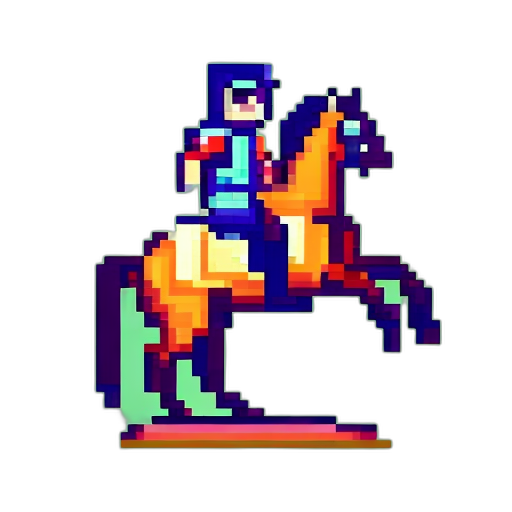

In [24]:
image[0]

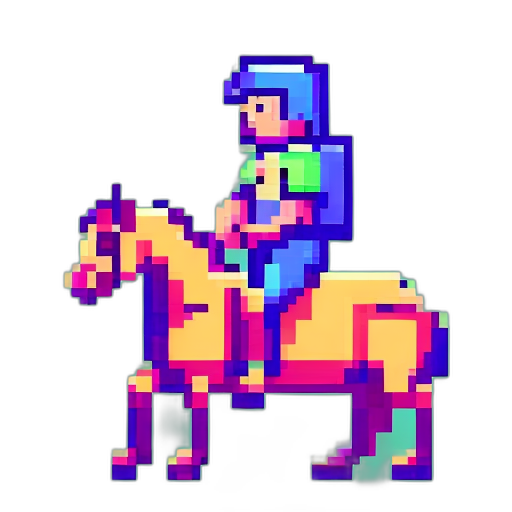

In [25]:
image[1]

In [7]:
','.join(['plain background','detailed edge'])

'plain background,detailed edge'

In [19]:
pipeline.to("cuda")
prompt = "korean traditional hanok pixelsprite"
image = pipeline(prompt).images[0]  


  0%|          | 0/50 [00:00<?, ?it/s]

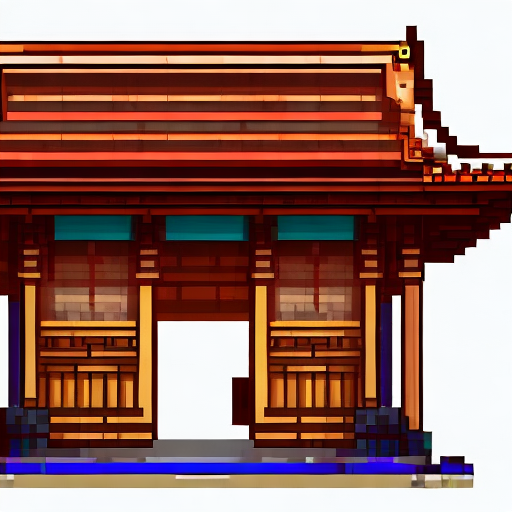

In [20]:
image

In [ ]:
pipeline.to("cuda")
prompt = "korean traditional hanok pixelsprite"
image = pipeline(prompt).images[0]  


In [14]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers import UniPCMultistepScheduler
import torch

controlnet_model = "lllyasviel/sd-controlnet-canny"
sd_model = "PublicPrompts/All-In-One-Pixel-Model"

controlnet = ControlNetModel.from_pretrained(
    controlnet_model,
    torch_dtype=torch.float16
)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    sd_model, controlnet=controlnet, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


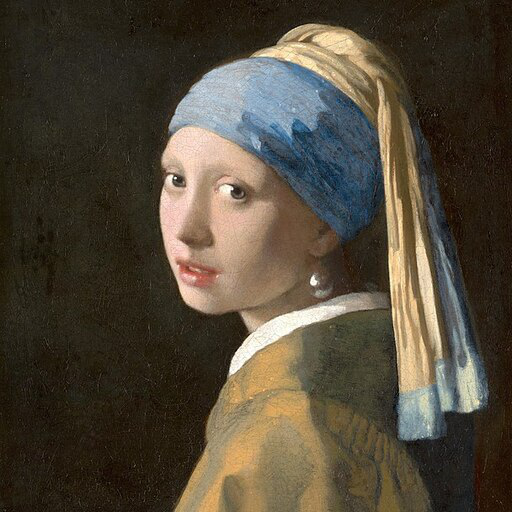

In [15]:
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png")

image

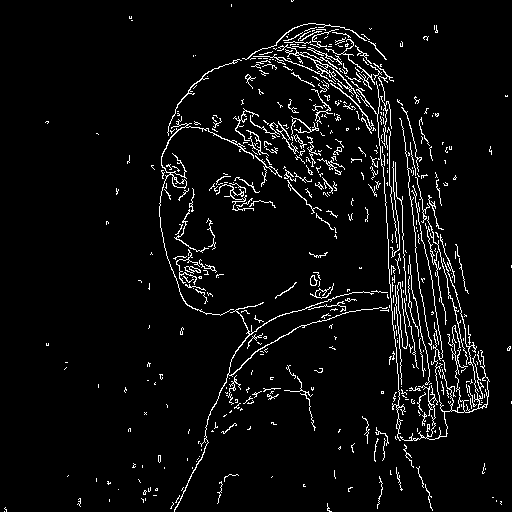

In [16]:
import cv2
from PIL import Image
import numpy as np

low_threshold = 100
high_threshold = 200

np_image = np.array(image)

canny_image = cv2.Canny(np_image, low_threshold, high_threshold)

canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_image = Image.fromarray(canny_image)

canny_image

  0%|          | 0/20 [00:00<?, ?it/s]

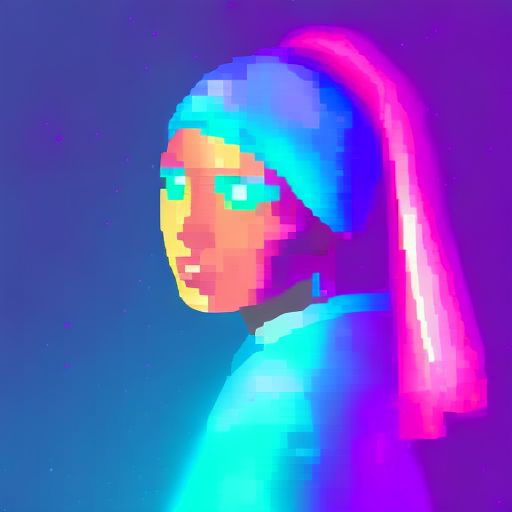

In [28]:
prompt = "disco dancer with colorful lights pixelsprite plain background"
num_steps = 20
seed = 0

out_image = pipe(
    prompt,
    num_inference_steps=num_steps,
    generator=torch.manual_seed(seed),
    image=canny_image
).images[0]

out_image

In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  

D:\anaconda3\envs\genai\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\USER\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

D:\anaconda3\envs\genai\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

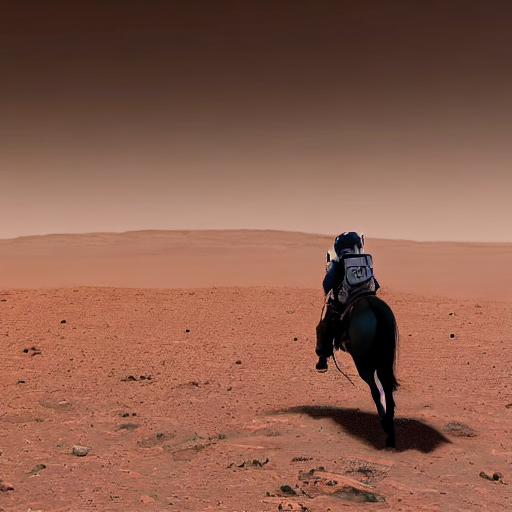

In [2]:
image

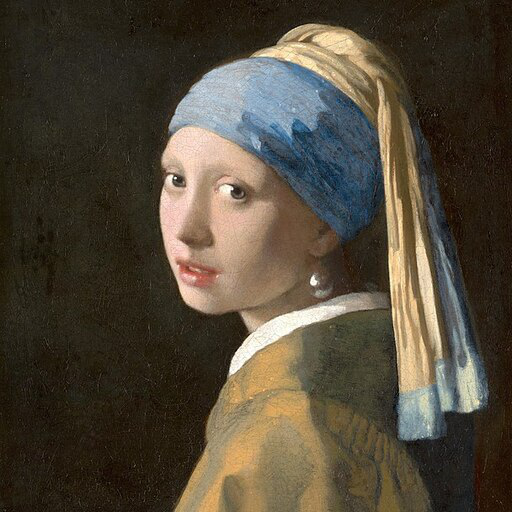

In [6]:
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png")

image

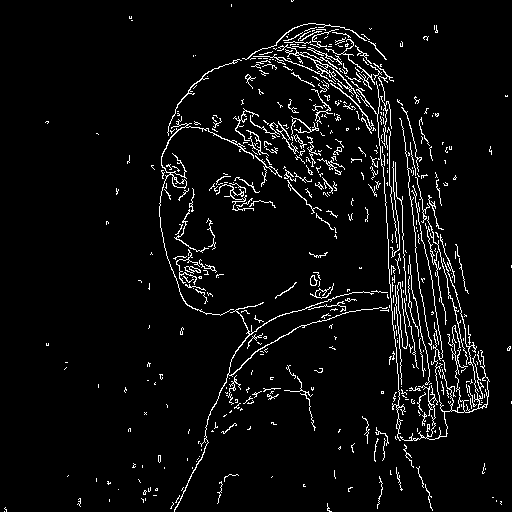

In [7]:
import cv2
from PIL import Image
import numpy as np

low_threshold = 100
high_threshold = 200

np_image = np.array(image)

canny_image = cv2.Canny(np_image, low_threshold, high_threshold)

canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_image = Image.fromarray(canny_image)

canny_image

In [10]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers import UniPCMultistepScheduler
import torch

controlnet_model = "lllyasviel/sd-controlnet-canny"
sd_model = "runwayml/stable-diffusion-v1-5"

controlnet = ControlNetModel.from_pretrained(
    controlnet_model,
    torch_dtype=torch.float16
)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    pipe, controlnet=controlnet, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

TypeError: stat: path should be string, bytes, os.PathLike or integer, not StableDiffusionPipeline

  0%|          | 0/20 [00:00<?, ?it/s]

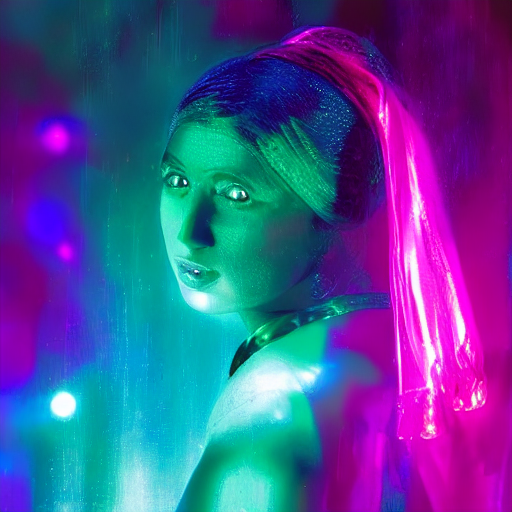

In [8]:
prompt = "disco dancer with colorful lights"
num_steps = 20
seed = 0

out_image = pipe(
    prompt,
    num_inference_steps=num_steps,
    generator=torch.manual_seed(seed),
    image=canny_image
).images[0]

out_image

In [9]:
from transformers import pipeline
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from PIL import Image
import numpy as np
import torch
from diffusers.utils import load_image

depth_estimator = pipeline('depth-estimation')

No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [12]:
controlnet_model = "fusing/stable-diffusion-v1-5-controlnet-depth"
sd_model = "andite/anything-v4.0"

new_controlnet = ControlNetModel.from_pretrained(
    controlnet_model,
    torch_dtype=torch.float16
)

new_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    sd_model,
    controlnet=new_controlnet,
    safety_checker=None,
    torch_dtype=torch.float16,
)

new_pipe.enable_model_cpu_offload()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


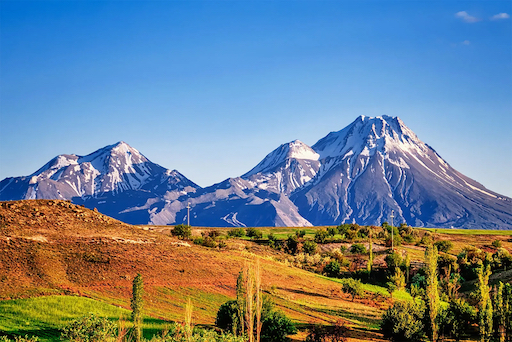

In [14]:
image = load_image("https://i.imgur.com/2V9gTol.jpg")

image

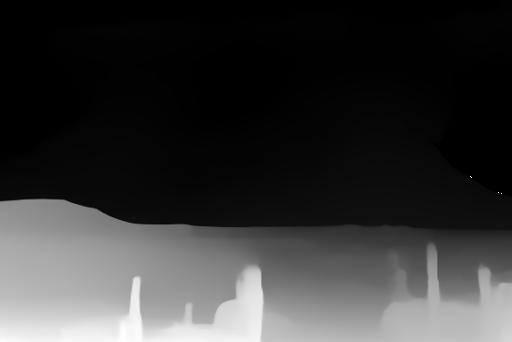

In [15]:
depth_image = depth_estimator(image)['depth']
depth_image = np.array(depth_image)
depth_image = depth_image[:, :, None]
depth_image = np.concatenate([depth_image, depth_image, depth_image], axis=2)
depth_image = Image.fromarray(depth_image)

depth_image

  0%|          | 0/50 [00:00<?, ?it/s]

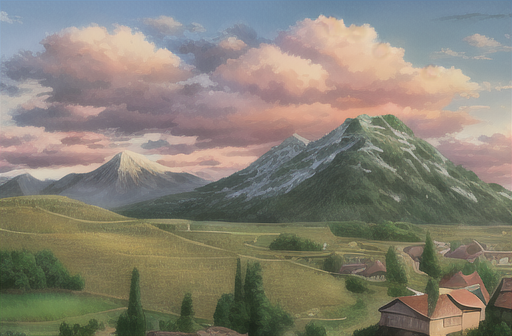

In [16]:
prompt = "scenery, mountain, village, outdoors, sky, clouds"
num_steps = 50
guidance_scale = 14
seed = 1

out_image = new_pipe(
    prompt,
    num_inference_steps=num_steps,
    guidance_scale=guidance_scale,
    generator=torch.manual_seed(seed),
    image=depth_image,
).images[0]

out_image